In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dython
import pickle
import joblib
from datetime import datetime
from dateutil import parser
from dython.nominal import associations
from sklearn.model_selection import train_test_split
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
#import + null value handling + preprocessing of dataset
df = pd.read_csv("cic_ids_2018.csv")
df.head()

start = []
for col in df.columns:
        if col[:7] == "Bwd IAT": 
                start.append(col)
print(start)

df = df.replace(0, np.nan)
df.dropna(how = "all", axis =1,inplace = True )
df.fillna(0, inplace = True)
df.dropna(how = "all", axis =0,inplace = True )

['Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min']


In [3]:
"""
Pkt Len Mean = length
Dst Port = port
'Flow Duration'
"""
df.columns


Index(['Unnamed: 0', 'Dst Port', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflo

In [4]:
scaler = MinMaxScaler()
X= df[["Dst Port","Pkt Len Mean","Flow Duration"]]
X = scaler.fit_transform(X)
y =df["Label"]
np.random.seed(42)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X

array([[5.17144034e-02, 1.02662694e-01, 9.99826368e-01],
       [8.08752842e-04, 4.95994589e-02, 9.99824023e-01],
       [0.00000000e+00, 0.00000000e+00, 9.99824236e-01],
       ...,
       [6.75995300e-03, 0.00000000e+00, 9.99823924e-01],
       [1.72584805e-02, 0.00000000e+00, 9.99823924e-01],
       [1.77620436e-02, 0.00000000e+00, 9.99823924e-01]])

In [11]:

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=3000)
clf = RandomForestClassifier(n_estimators=1000, n_jobs=5)
#svm = svm.SVC()

sgd.fit(X_train, y_train)
clf.fit(X_train, y_train)
# svm.fit(X_train, y_train)
# The shape is above 240,000
training_Score_SGD = sgd.score(X_train, y_train)
training_Score_CLF = clf.score(X_train, y_train)
# training_Score_SVM = svm.score(X_train, y_train)
test_Accuracy_Score_SGD = sgd.score(X_test, y_test)
test_Accuracy_Score_CLF = clf.score(X_test, y_test)
# test_Accuracy_Score_SVM = svm.score(X_test, y_test)

print (f'Training SGD score = {training_Score_SGD *100:.2f}%')
print (f'Test Accuracy SGD score = {test_Accuracy_Score_SGD *100:.2f}%')
print()
print (f'Training CLF score = {training_Score_CLF *100:.2f}%')
print (f'Test Accuracy CLF score = {test_Accuracy_Score_CLF *100:.2f}%')
print()
#print (f'Training SVM score = {test_Accuracy_Score_SVM *100:.2f}%')
#print (f'Test Accuracy SVM score = {test_Accuracy_Score_SVM *100:.2f}%')


d:\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:57: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warnings.warn(


Training SGD score = 25.44%
Test Accuracy SGD score = 25.37%

Training CLF score = 81.53%
Test Accuracy CLF score = 78.26%



In [6]:
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)
y_preds

array(['DDOS attack-HOIC', 'Bot', 'DoS attacks-Slowloris', ...,
       'FTP-BruteForce', 'Infilteration', 'Benign'], dtype=object)

In [7]:
print(classification_report(y_test, y_preds))

                          precision    recall  f1-score   support

                  Benign       0.76      0.81      0.78     14997
                     Bot       1.00      1.00      1.00      3921
        DDOS attack-HOIC       0.67      0.68      0.68      3061
    DDOS attack-LOIC-UDP       0.99      1.00      0.99       340
   DoS attacks-GoldenEye       0.97      0.97      0.97      2926
        DoS attacks-Hulk       0.73      0.73      0.73      4037
DoS attacks-SlowHTTPTest       0.69      0.97      0.81      3999
   DoS attacks-Slowloris       0.99      0.99      0.99      2052
          FTP-BruteForce       0.92      0.42      0.57      2973
           Infilteration       0.60      0.53      0.56      8024
          SSH-Bruteforce       1.00      1.00      1.00      3016

                accuracy                           0.78     49346
               macro avg       0.85      0.83      0.83     49346
            weighted avg       0.79      0.78      0.78     49346



[Text(0.5, 1.0, 'Confusion Matrix'),
 Text(0.5, 36.72222222222221, 'Predicted Class'),
 Text(208.22222222222223, 0.5, 'Actual Class')]

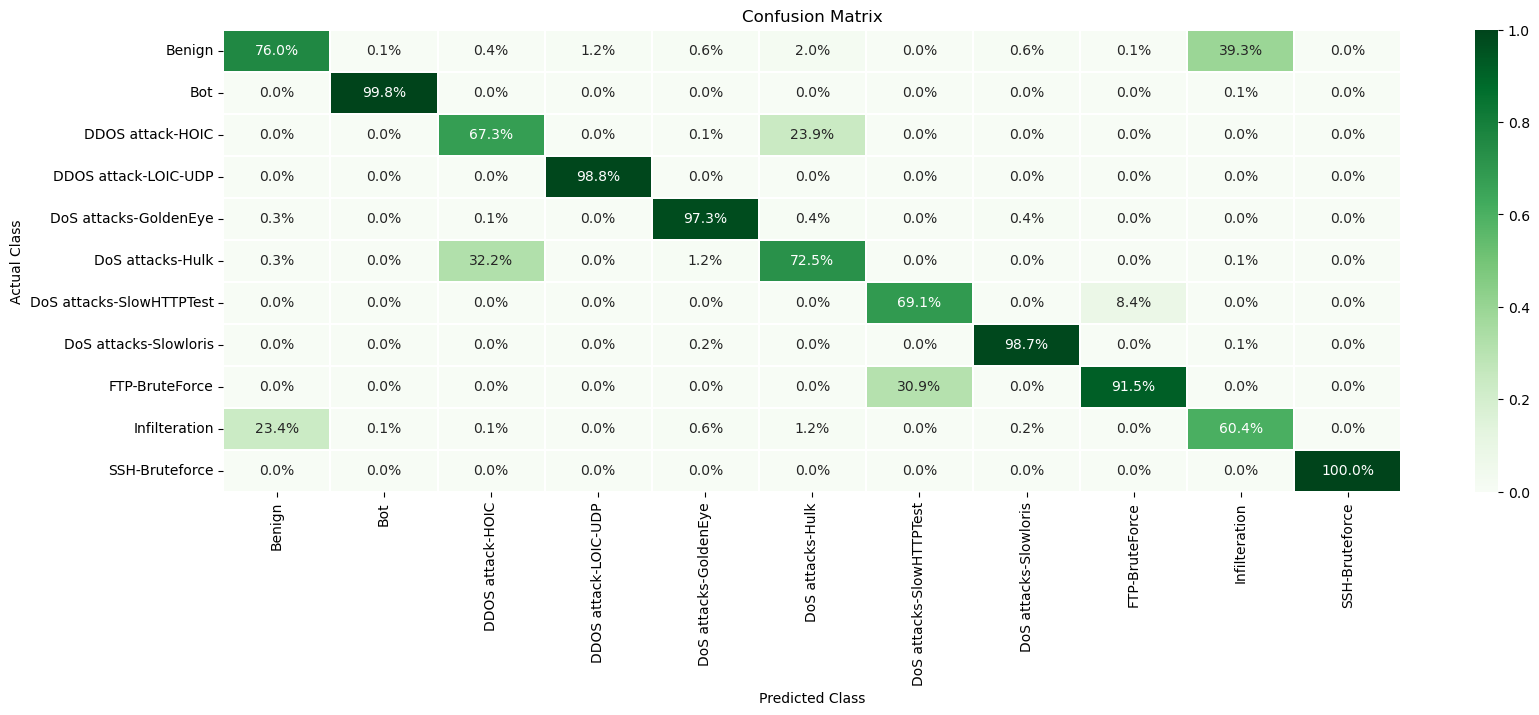

In [8]:
cm = confusion_matrix(y_test, y_preds)
cmd = pd.DataFrame(cm, columns = (['Benign', 'Bot', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP',
       'DoS attacks-GoldenEye',"DoS attacks-Hulk","DoS attacks-SlowHTTPTest","DoS attacks-Slowloris","FTP-BruteForce"\
              ,"Infilteration","SSH-Bruteforce"]), index =(['Benign', 'Bot', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP',
       'DoS attacks-GoldenEye',"DoS attacks-Hulk","DoS attacks-SlowHTTPTest","DoS attacks-Slowloris","FTP-BruteForce"\
              ,"Infilteration","SSH-Bruteforce"] ))
fig, ax = plt.subplots(figsize = (19,6))
sns.heatmap(cmd/np.sum(cmd), fmt= '.1%' ,linewidth=0.3, cmap = 'Greens',xticklabels = True, annot =True)
ax.set(title = 'Confusion Matrix', xlabel = 'Predicted Class', ylabel = 'Actual Class')

In [9]:
# Assuming 'clf' is the predictive model object
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)

ModuleNotFoundError: No module named 'autogluon'